## Imports

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.metrics import *
from general_analysis import *
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from explore_hyperparameter import *
from plot_learning_curve import *
import time

import warnings
warnings.filterwarnings('ignore')


RANDOM_STATE = 5000 #to keep results consistent


## Load Data

In [2]:
data = []
f = open('spambase.data')
readcsv = csv.reader(f)
classes = next(readcsv, None)
print(classes)
for row in readcsv:
    data.append(row)
f.close()

word_labels = ['address', 'all', '3d', 'our', 'over', 'remove', 'internet',
               'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
               'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000',
               'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
               'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
               'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference']



['0', '0.64', '0.64', '0', '0.32', '0', '0', '0', '0', '0', '0', '0.64', '0', '0', '0', '0.32', '0', '1.29', '1.93', '0', '0.96', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.778', '0', '0', '3.756', '61', '278', '1']


### Separate X and y

In [3]:
X = np.array([x[:-1] for x in data]).astype(np.float)
y = np.array([x[-1] for x in data]).astype(np.float)
X = preprocessing.scale(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = RANDOM_STATE)
X_train = X_train[:, 0:48]
X_test = X_test[:, 0:48]
y_test = y_test.astype(int)
y_train = y_train.astype(int)
y_test = np.array(y_test)


## NEW ANALYSIS

when max depth is 1, you need a lot of estimators because there is a lot more error. the more estimators, the more those datapoints classified incorrectly are "fixed" by the other estimators

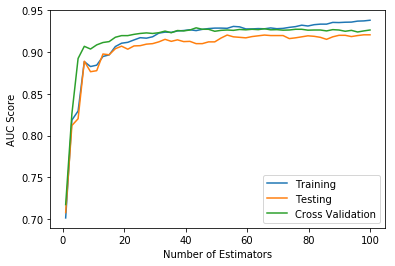

In [4]:
param = np.linspace(1, 100, 50, endpoint=True)
clf = [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE), n_estimators=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Number of Estimators')

when max depth is 32, one decision tree already gets a pretty high accuracy so the weighted error sampling does not do much, testing AUC oscillates but is pretty much staying the same

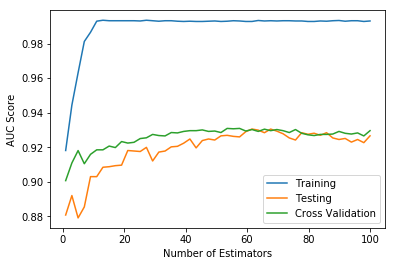

In [5]:
param = np.linspace(1, 100, 50, endpoint=True)
clf = [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8, random_state=RANDOM_STATE), n_estimators=int(i), random_state=RANDOM_STATE) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Number of Estimators')

## Learning Curve

43.6415810585022


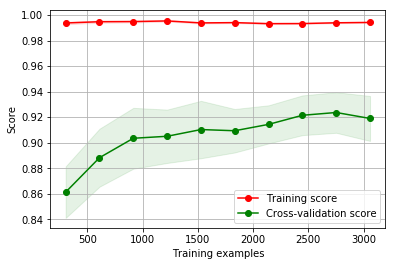

In [6]:
start = time.time()
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8, random_state=RANDOM_STATE), n_estimators=20)
clf.fit(X_train, y_train)
plot_learning_curve(clf, X_train, y_train, cv=20, train_sizes = np.linspace(0.1, 1, 10))
print(time.time()-start)

# Analyze time on all models (time to calculate the learning curve)
(This will be different on each machine)

Text(0.5,0,'Model')

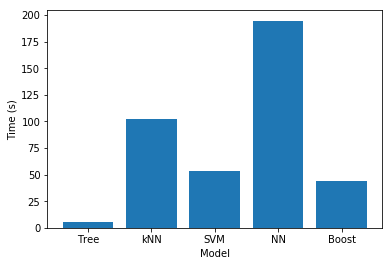

In [8]:
boost = 43.6415810585022
nn = 194.6831750869751
svm = 53.84552311897278
knn = 102.2392430305481
tree = 5.3020031452178955
times = [tree, knn, svm, nn, boost]
names = ['Tree', 'kNN', 'SVM', 'NN', 'Boost']
plt.bar(names, times)
plt.ylabel('Time (s)')
plt.xlabel('Model')

# Analyze scores on all models

(0.85, 0.95)

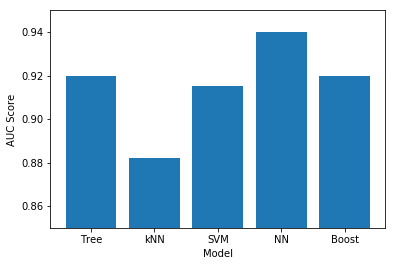

In [12]:
boost = 0.92
nn = 0.94
svm = 0.915
knn = 0.882
tree = 0.92
scores = [tree, knn, svm, nn, boost]
names = ['Tree', 'kNN', 'SVM', 'NN', 'Boost']
plt.bar(names, scores)
plt.ylabel('AUC Score')
plt.xlabel('Model')
axes = plt.gca()
axes.set_ylim([0.85,0.95])